
#EXPLORATORY DATA ANALYSIS - RETAIL
####THE SPARKS FOUNDATION-GRIP (MAY 2023)
####Submitted by - SHRUTI KHANDELWAL


##TASK:
Perform EDA on the dataset 'SampleSuperStore'

As a business manager, try to find out the weak areas where you can work to make more profit.

What all business problems you can derive by exploring the data?

#####Importing Libraries

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#####Loading Dataset

In [177]:
df = pd.read_csv(r'SampleSuperstore.csv')
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [178]:
#Checking the rows and columns of the dataset
df.shape

(9994, 13)

In [179]:
#Complete information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [180]:
#Checking null values
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [181]:
#Checking duplicates
df.duplicated().sum()

17

In [182]:
#Remove Duplicates
df = df.drop_duplicates()

#Let's check again now
df.duplicated().sum()

0

In [183]:
#Summary stats of numerical column
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


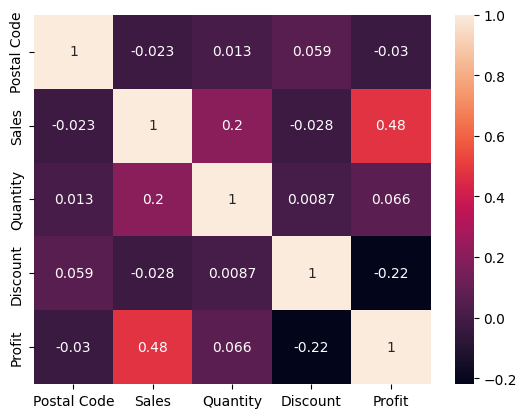

In [184]:
#Let's check correlation 
sns.heatmap(df.corr(), annot=True)
plt.show()

### EXPLORATORY DATA ANALYSIS

#### Univariate Analysis

In [185]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

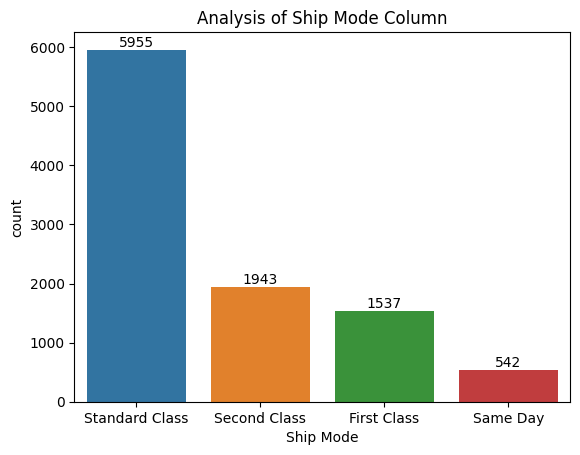

In [186]:
#visualizing ship mode column
labels = df['Ship Mode'].value_counts().sort_values(ascending=False).values
ax = sns.countplot(x = df['Ship Mode'],order=df['Ship Mode'].value_counts(ascending=False).index)
ax.bar_label(container = ax.containers[0],labels = labels)
plt.title('Analysis of Ship Mode Column')
plt.show()

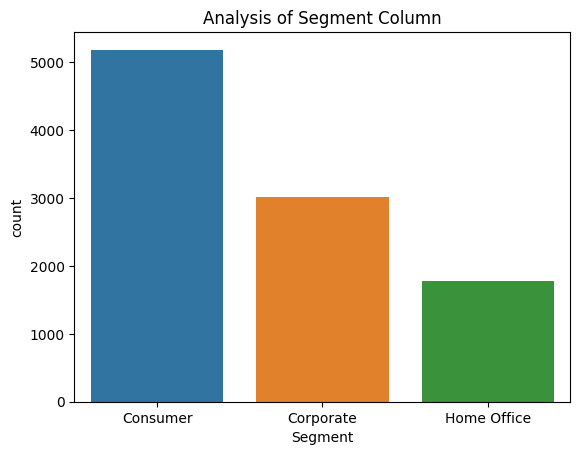

In [187]:
#visualizing Segment column
sns.countplot(x = df.Segment)
plt.title('Analysis of Segment Column')
plt.show()

In [188]:
df.Country.value_counts()

United States    9977
Name: Country, dtype: int64

In [189]:
#As there is only one country and postal code, we should drop it. It's of no use.
df = df.drop(columns=['Country','Postal Code'], axis=1)

In [190]:
df.columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [191]:
df.City.value_counts()

New York City      914
Los Angeles        746
Philadelphia       536
San Francisco      506
Seattle            424
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: City, Length: 531, dtype: int64

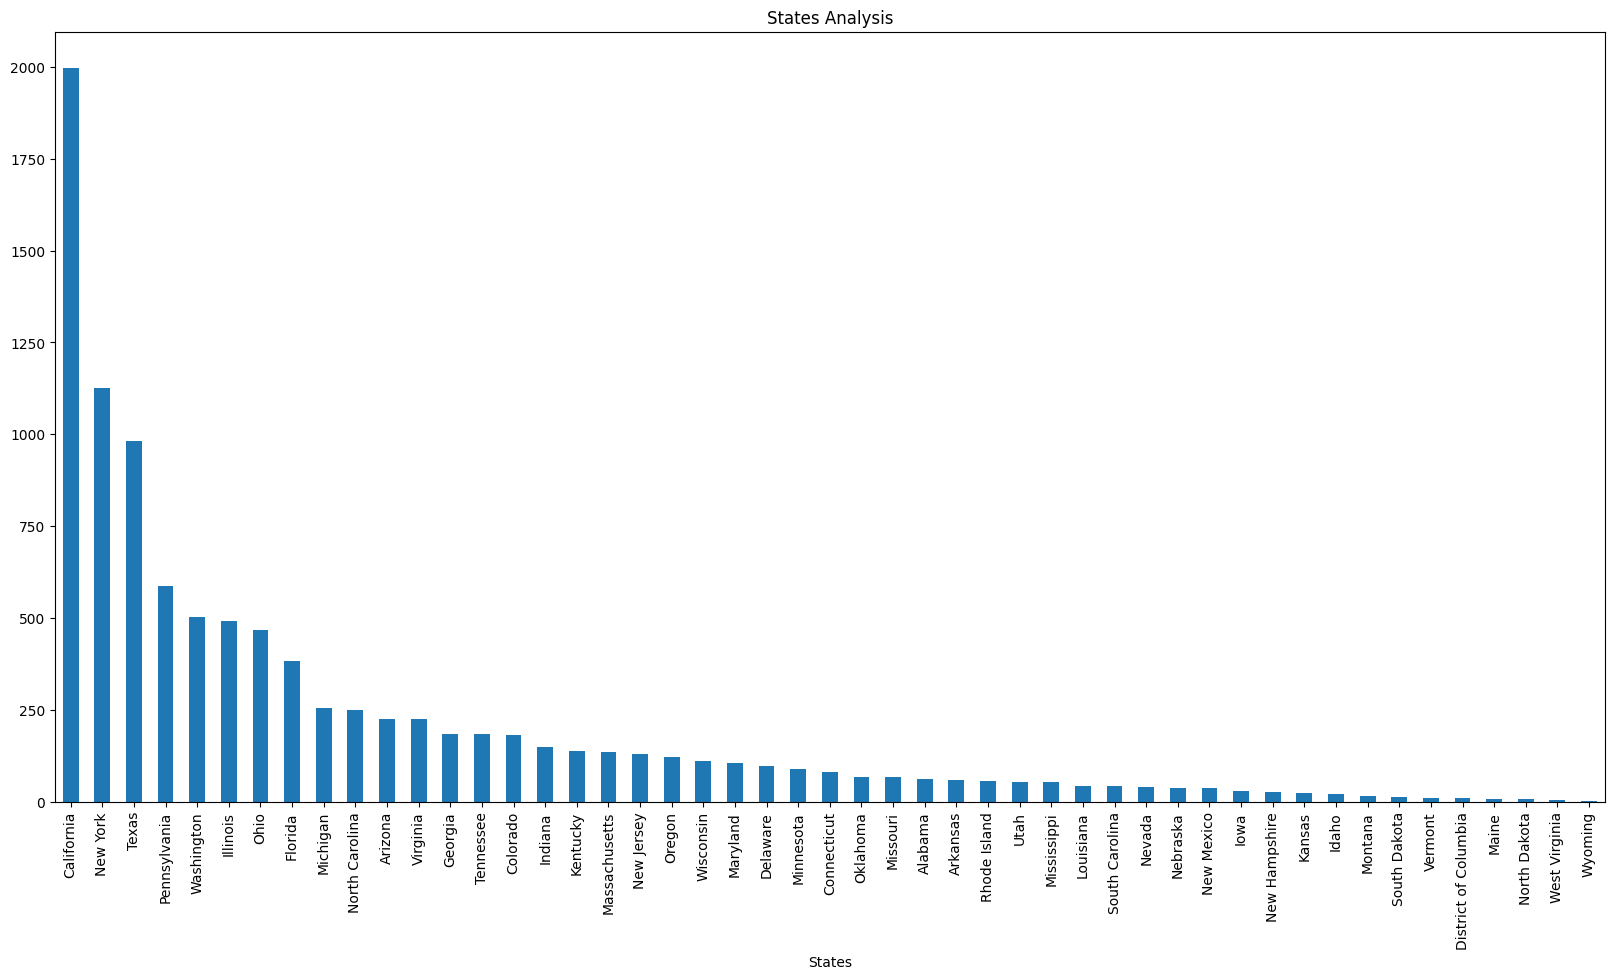

In [192]:
#Visualizing States Columns
plt.figure(figsize=(20,10))
df.State.value_counts().plot(kind='bar')
plt.xlabel('States')
plt.title('States Analysis')
plt.show()

In [193]:
df.columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [194]:
df.Region.value_counts()

West       3193
East       2845
Central    2319
South      1620
Name: Region, dtype: int64

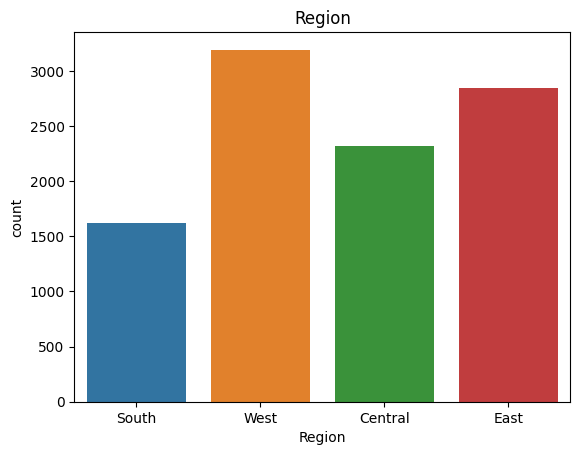

In [195]:
sns.countplot(x=df.Region)
plt.title('Region')
plt.show()

In [196]:
df.Category.value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

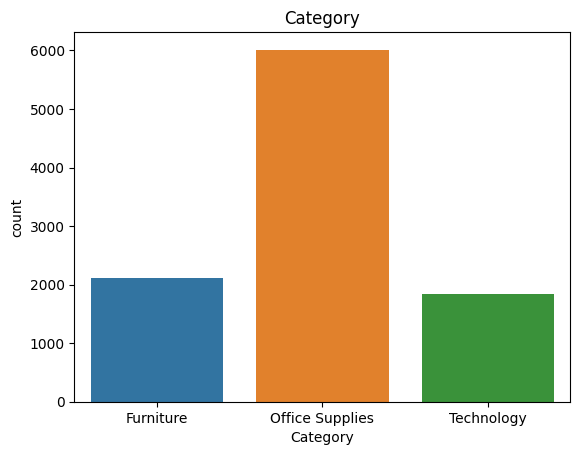

In [197]:
sns.countplot(x=df.Category)
plt.title('Category')
plt.show()

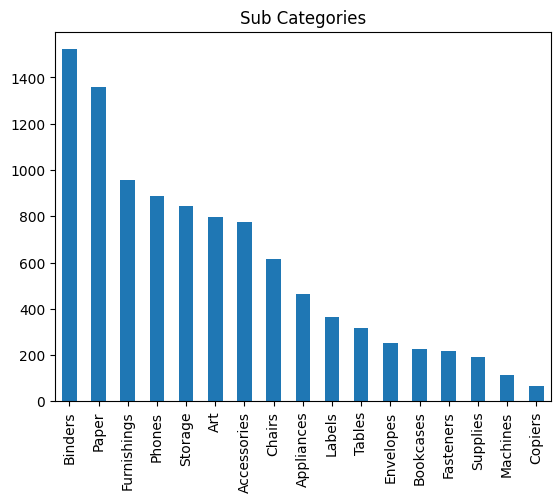

In [198]:
df['Sub-Category'].value_counts().plot(kind='bar')
plt.title('Sub Categories')
plt.show()

In [199]:
df.columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

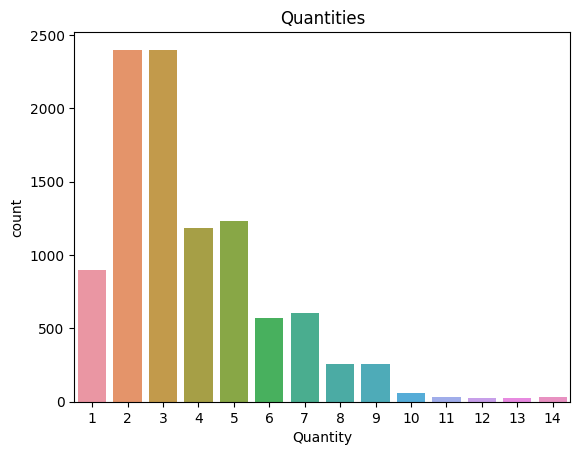

In [200]:
sns.countplot(x = df.Quantity)
plt.title('Quantities')
plt.show()

In [201]:
#Sales Column
df.Sales.value_counts()

12.960     55
19.440     37
15.552     37
10.368     35
25.920     34
           ..
4.240       1
319.960     1
646.740     1
81.940      1
243.160     1
Name: Sales, Length: 5825, dtype: int64

<Axes: >

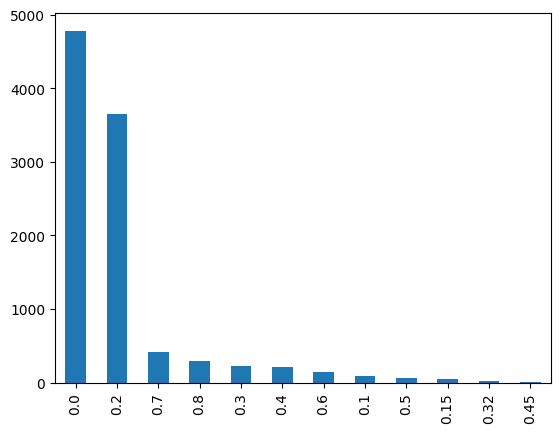

In [202]:
#Discount column
df.Discount.value_counts().plot(kind='bar')

No discount, 20% Discount and 70% Discount were given a lot. 

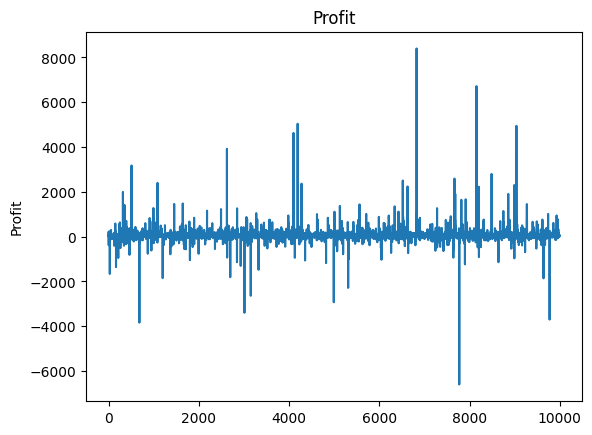

In [203]:
sns.lineplot(df.Profit)
plt.title('Profit')
plt.show()

In [204]:
#As also shown in above figure
print('Max Profit: ',df.Profit.max())
print('Min Profit: ', df.Profit.min())

Max Profit:  8399.976
Min Profit:  -6599.978


###Bivariate Analysis

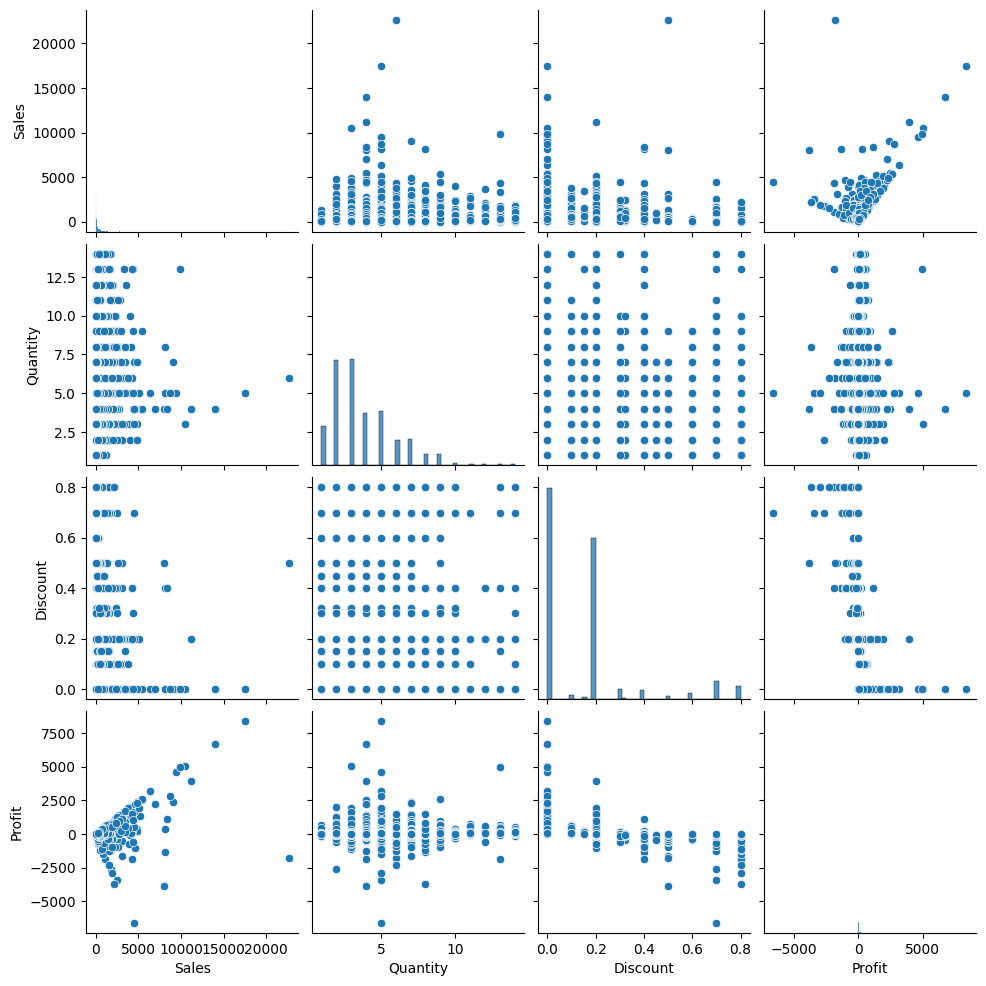

In [205]:
sns.pairplot(df[['Sales', 'Quantity', 'Discount', 'Profit']])
plt.show()

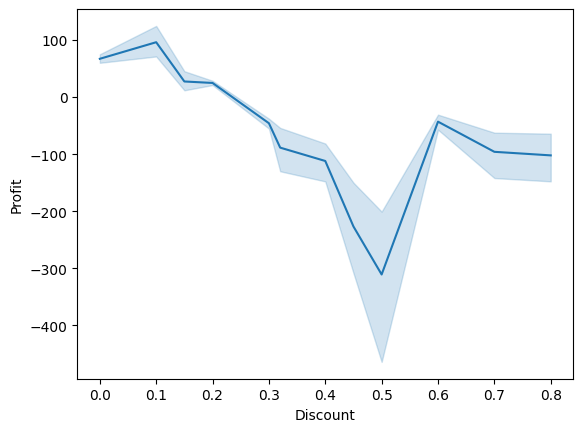

In [206]:
#Discount vs Profit
sns.lineplot(x='Discount', y='Profit', data=df)
plt.show()

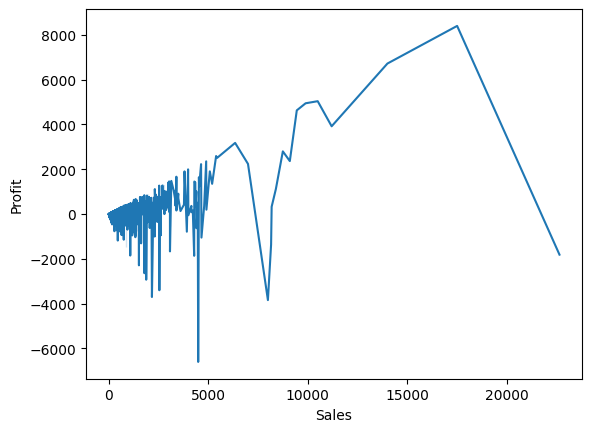

In [207]:
#Sales vs Profit
sns.lineplot(x='Sales', y='Profit', data=df)
plt.show()

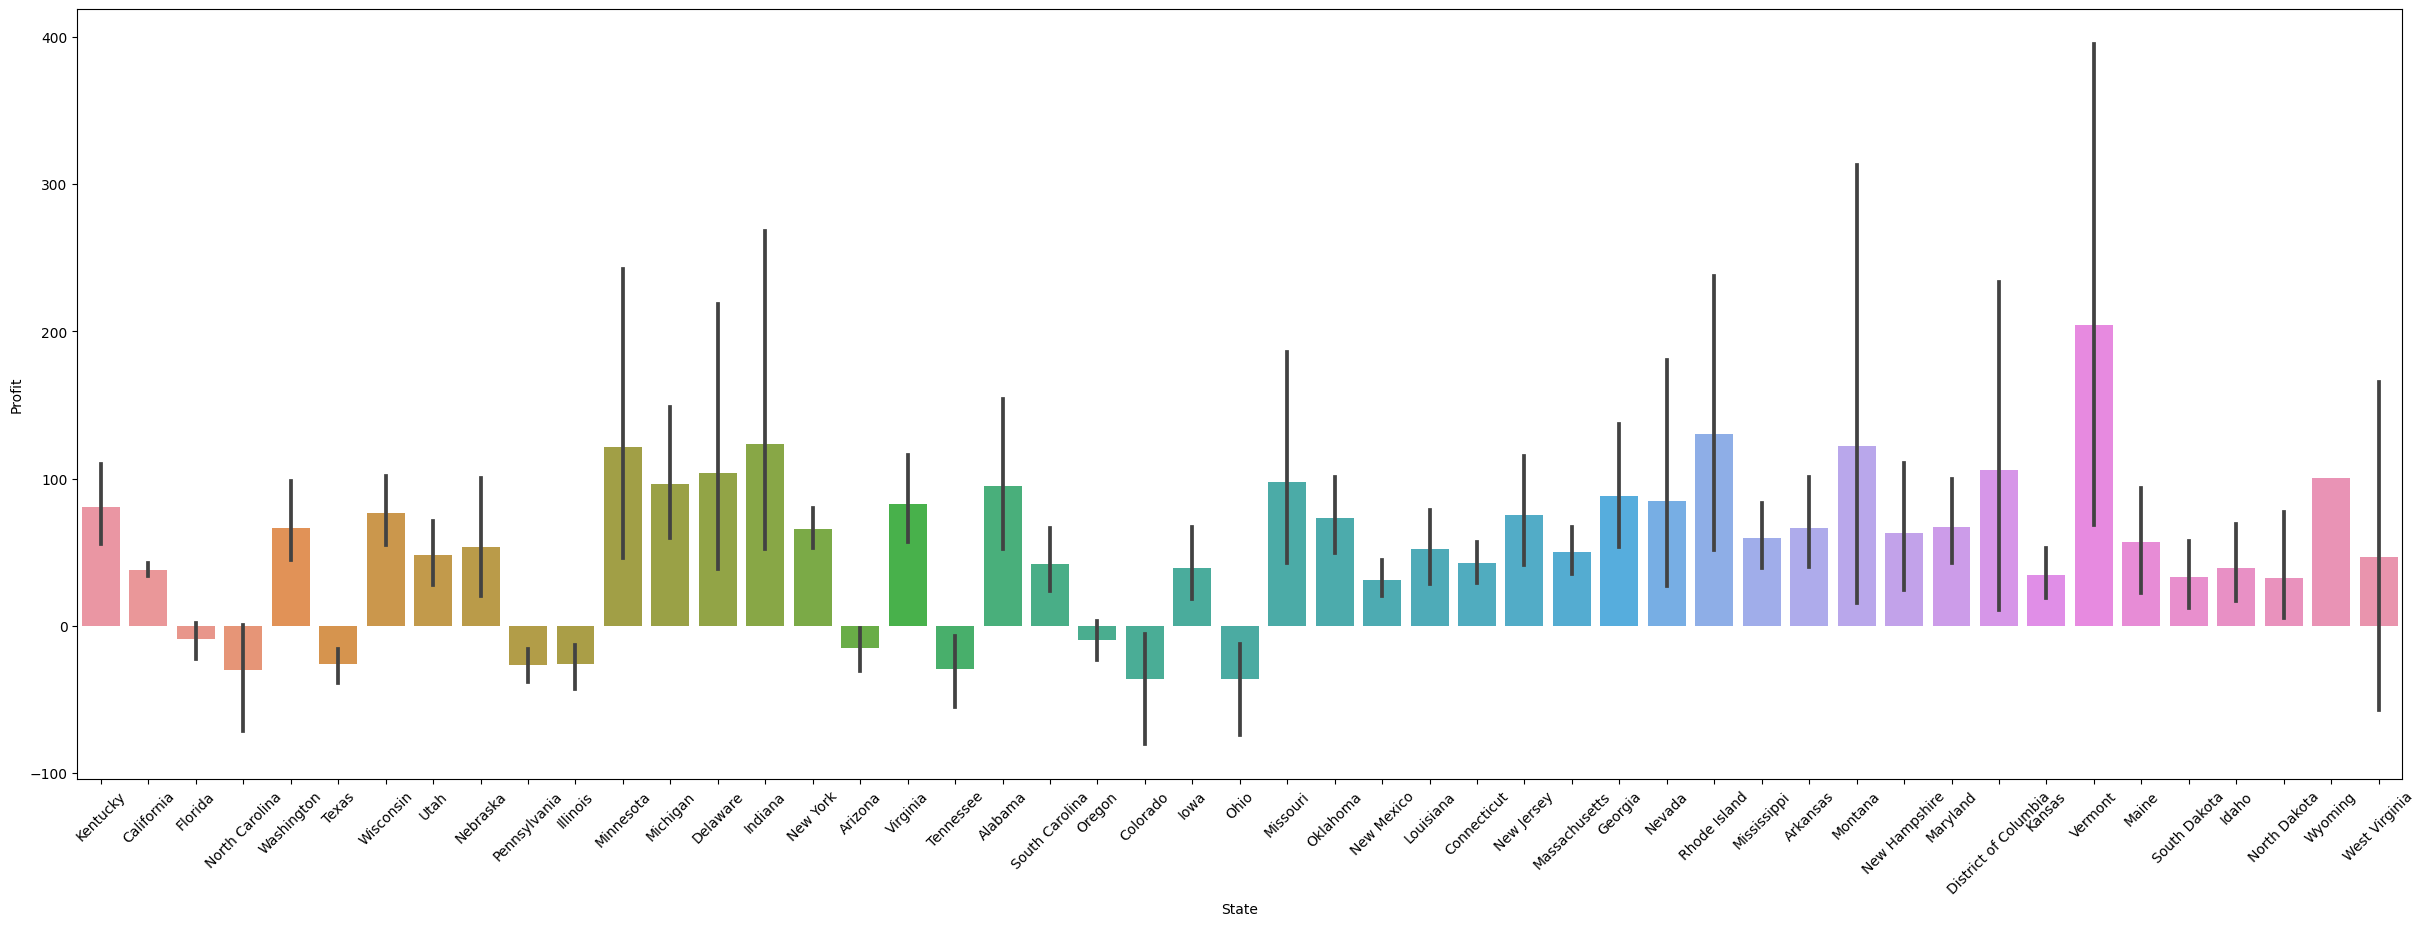

In [208]:
#State vs Profit
plt.figure(figsize=(30,10))
sns.barplot(x='State', y='Profit', data=df)
plt.xticks(rotation= 45)
plt.show()

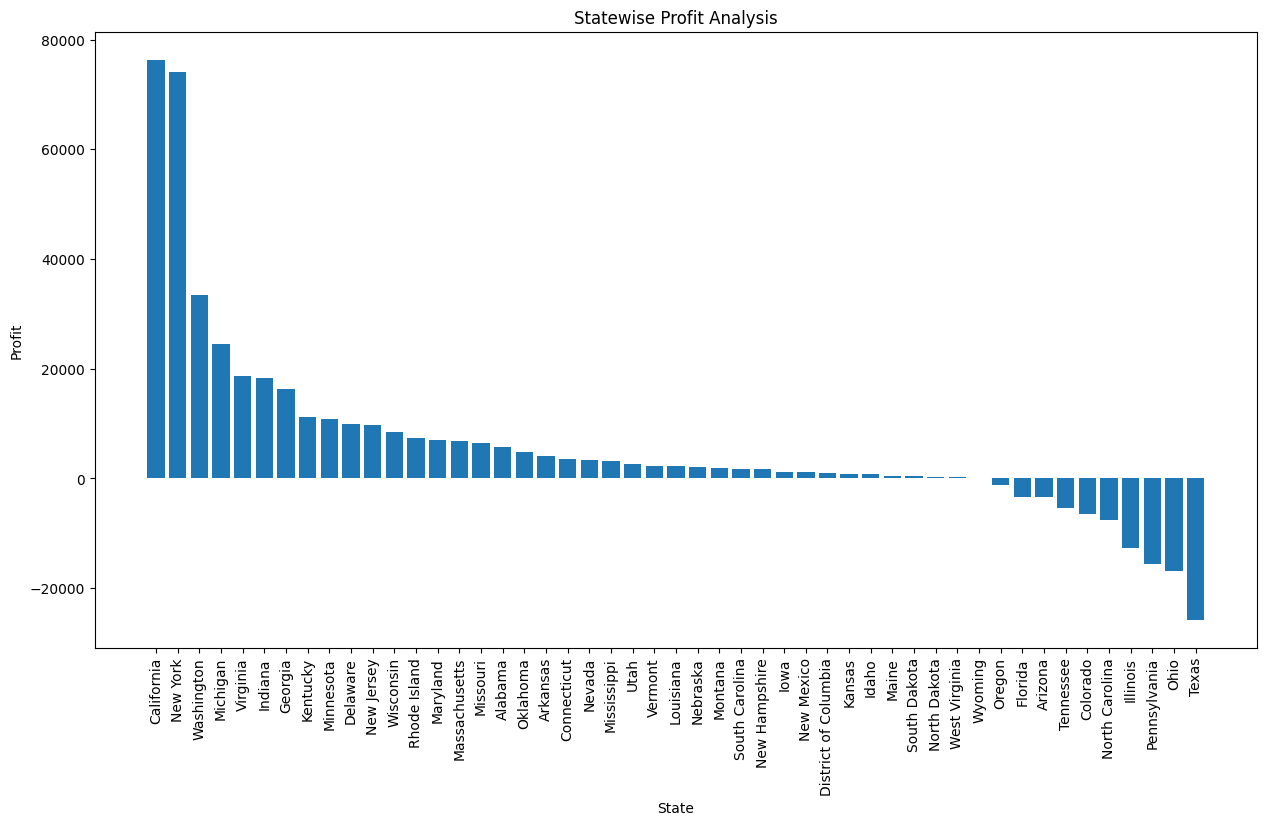

In [209]:
# Group the data by state and compute the total profit for each state
state_profit = df.groupby(['State'])['Profit'].sum().reset_index()

# Sort the data in descending order of profit
state_profit = state_profit.sort_values(by='Profit', ascending=False)

# Plot the statewise profit
plt.figure(figsize=(15, 8))
plt.bar(state_profit['State'], state_profit['Profit'])
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Profit')
plt.title('Statewise Profit Analysis')
plt.show()

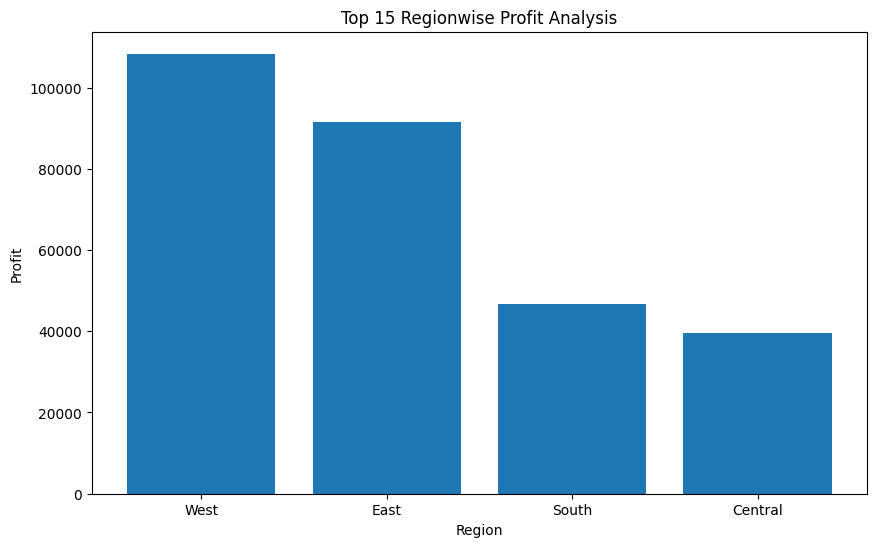

In [210]:
# Group the data by region and compute the total profit for each region
region_profit = df.groupby(['Region'])['Profit'].sum().reset_index()

# Sort the data in descending order of profit and select top 15 regions
region_profit = region_profit.sort_values(by='Profit', ascending=False).head(15)

# Plot the regionwise profit
plt.figure(figsize=(10, 6))
plt.bar(region_profit['Region'], region_profit['Profit'])
plt.xlabel('Region')
plt.ylabel('Profit')
plt.title('Top 15 Regionwise Profit Analysis')
plt.show()

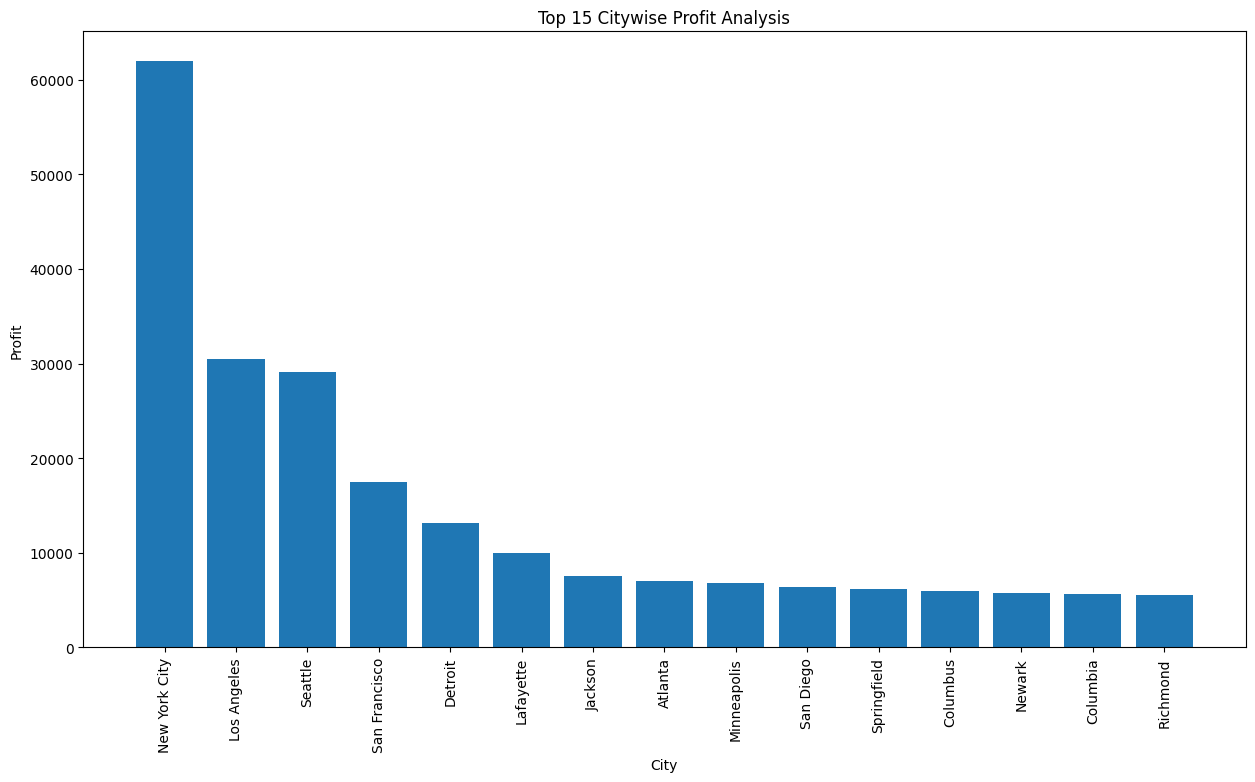

In [211]:
# Group the data by city and compute the total profit for each city
city_profit = df.groupby(['City'])['Profit'].sum().reset_index()

# Sort the data in descending order of profit and select top 15 cities
city_profit = city_profit.sort_values(by='Profit', ascending=False).head(15)

# Plot the citywise profit
plt.figure(figsize=(15, 8))
plt.bar(city_profit['City'], city_profit['Profit'])
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('Profit')
plt.title('Top 15 Citywise Profit Analysis')
plt.show()

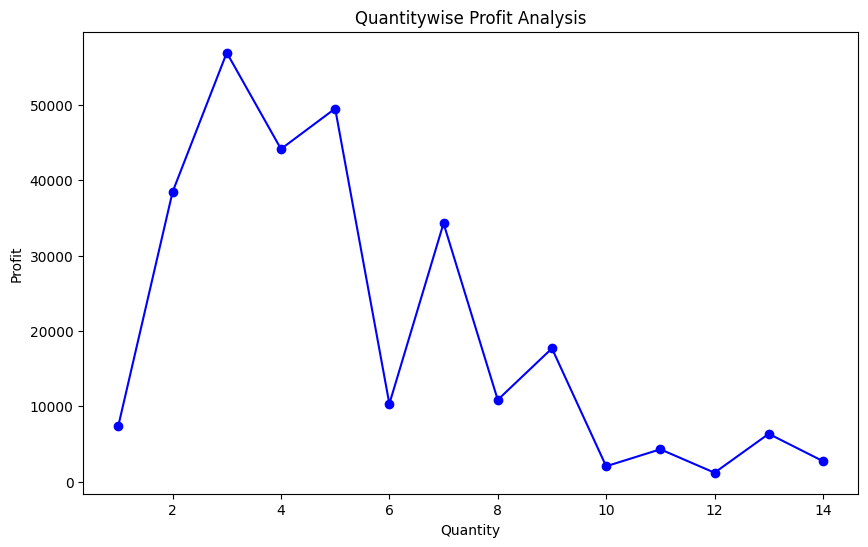

In [212]:
# Group the data by quantity and compute the total profit for each quantity
quantity_profit = df.groupby(['Quantity'])['Profit'].sum().reset_index()

# Sort the data in ascending order of quantity
quantity_profit = quantity_profit.sort_values(by='Quantity', ascending=True)

# Plot the quantitywise profit
plt.figure(figsize=(10, 6))
plt.plot(quantity_profit['Quantity'], quantity_profit['Profit'], 'bo-')
plt.xlabel('Quantity')
plt.ylabel('Profit')
plt.title('Quantitywise Profit Analysis')
plt.show()

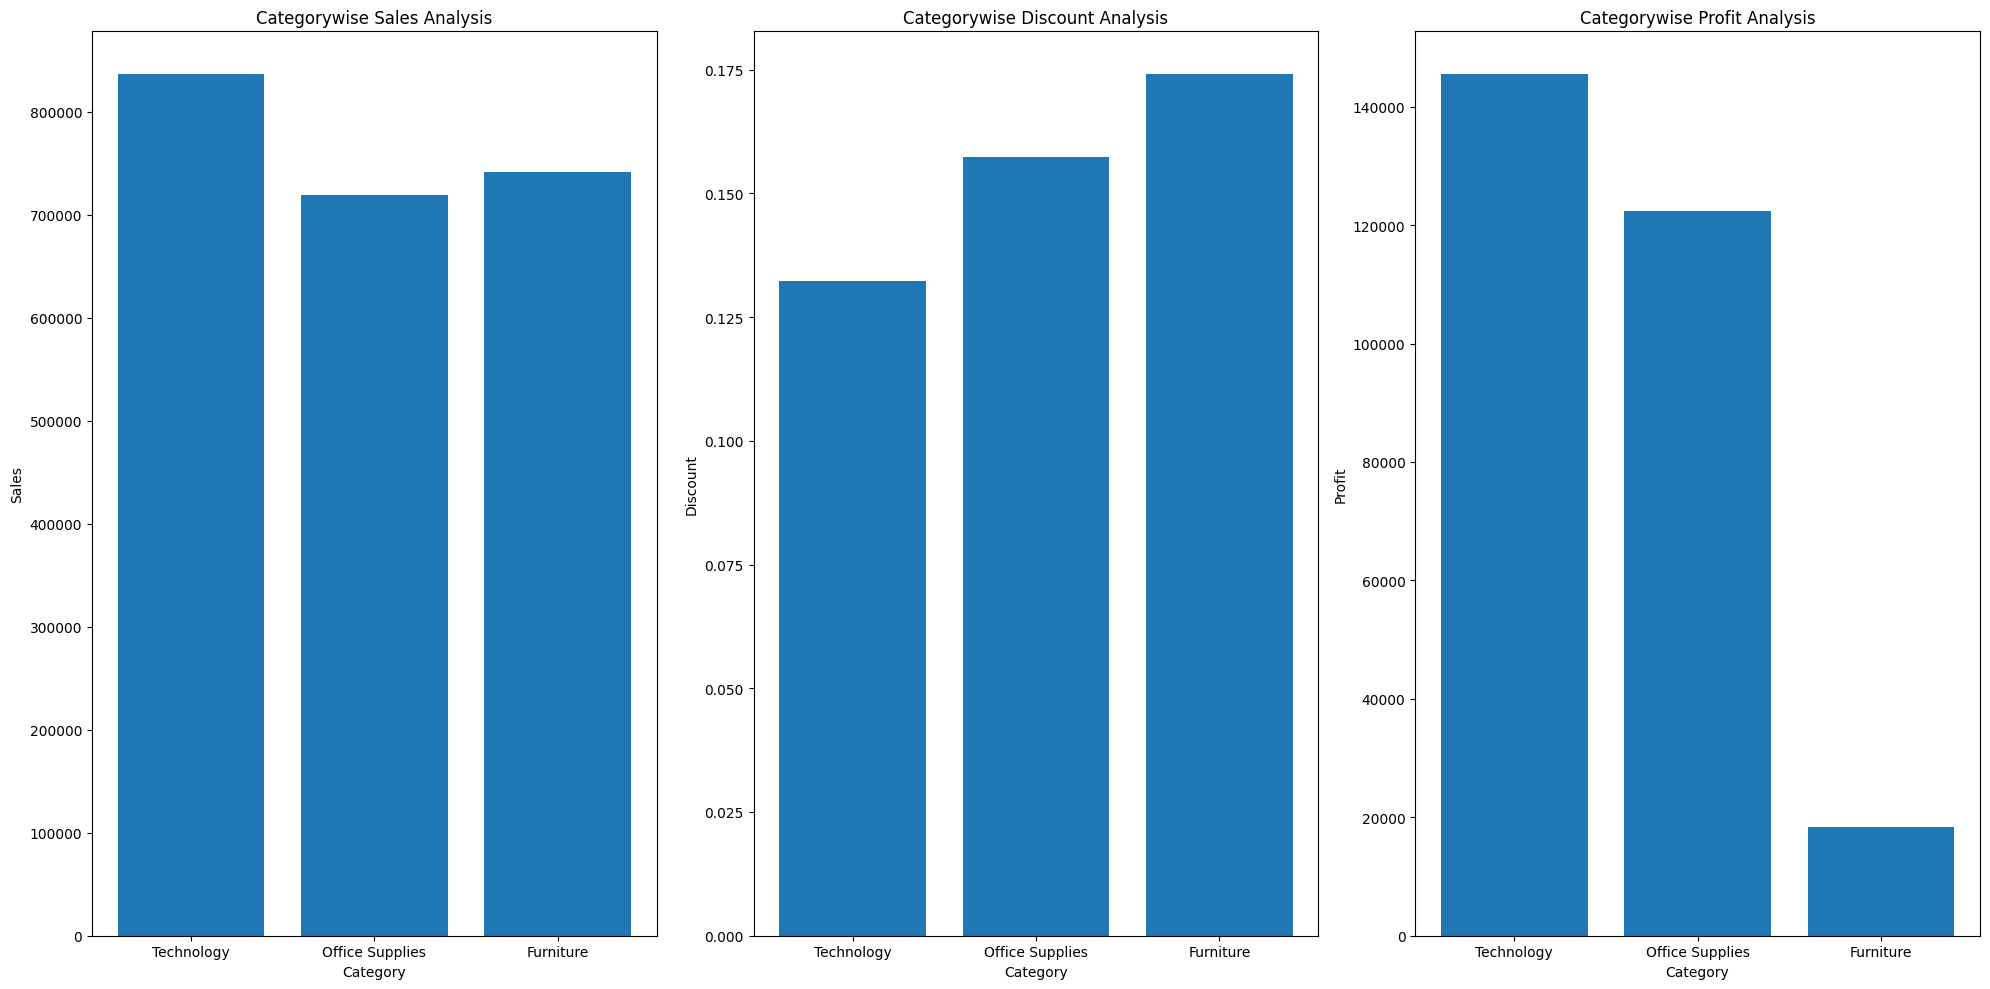

In [213]:
# Group the data by category and compute the total sales, discount and profit for each category
category_analysis = df.groupby(['Category']).agg({'Sales': 'sum', 'Discount': 'mean', 'Profit': 'sum'}).reset_index()

# Sort the data in descending order of profit
category_analysis = category_analysis.sort_values(by='Profit', ascending=False)

# Plot the category wise sales, discount and profit analysis
plt.figure(figsize=(20,10))

# Bar plot for sales
plt.subplot(1, 3, 1)
plt.bar(category_analysis['Category'], category_analysis['Sales'])
plt.xlabel('Category')
plt.ylabel('Sales')
plt.title('Categorywise Sales Analysis')

# Bar plot for discount
plt.subplot(1, 3, 2)
plt.bar(category_analysis['Category'], category_analysis['Discount'])
plt.xlabel('Category')
plt.ylabel('Discount')
plt.title('Categorywise Discount Analysis')

# Bar plot for profit
plt.subplot(1, 3, 3)
plt.bar(category_analysis['Category'], category_analysis['Profit'])
plt.xlabel('Category')
plt.ylabel('Profit')
plt.title('Categorywise Profit Analysis')

plt.tight_layout()
plt.show()
